In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_MachineLearning\diabetes.csv")
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=42)

# MODEL TAHMİN

In [3]:
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)

In [8]:
 #parametrelerin detaylarına göz atabiliyoruz

In [9]:
?gbm_model    

Type:        GradientBoostingClassifier
String form:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
           <...>                  validation_fraction=0.1, verbose=0,
           warm_start=False)
Length:      100
File:        c:\users\onur\anaconda3\envs\test_conda_env\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, optional (default='deviance')
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for 

In [10]:
y_pred=gbm_model.predict(X_test)

In [11]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# MODEL TUNİNG

In [12]:
gbm=GradientBoostingClassifier()

In [13]:
gbm_params={'learning_rate':[0.1,0.01,0.001,0.05],
            'n_estimators':[100,300,500,1000],
            'max_depth':[2,3,5,8]}

In [14]:
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  5.7min finished


In [15]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
# FİNAL MODEL

In [22]:
gbm_tuned=GradientBoostingClassifier(learning_rate=0.01,n_estimators=300,max_depth=5).fit(X_train,y_train)

In [23]:
y_pred=gbm_tuned.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred)

0.7489177489177489

# DEĞİŞKEN ÖNEM DÜZEYİ

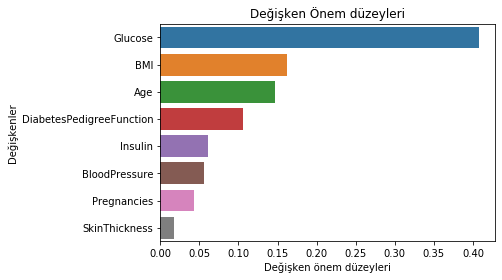

In [25]:
features_imp=pd.Series(gbm_tuned.feature_importances_,
                      index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=features_imp,y=features_imp.index)
plt.xlabel('Değişken önem düzeyleri')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem düzeyleri')
plt.show()